<a href="https://colab.research.google.com/github/elisaduan2005/chicago-crime-analysis/blob/main/Question_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime

violence = pd.read_csv('violence.csv')

from datetime import date
#question: How violent crime rates have changed over the years
violence = pd.read_csv("violence.csv")

#change everything to lower case
violence.columns = violence.columns.str.lower()

#remove any leading spaces
violence.columns = violence.columns.str.lstrip()

#replace spaces with underscore
violence.columns = violence.columns.str.replace(' ', '_')

#delete any double spaces
violence.columns = violence.columns.str.replace('__', '_')


#only HOMICIDE, BATTERY, ROBBERY
selected_crimes = ['HOMICIDE', 'BATTERY', 'ROBBERY']
violence1_filtered = violence[violence['victimization_primary'].isin(selected_crimes)]

# grouping by age, sex, victimization_primary, and race, then aggregating the count
violence_counts = (
    violence1_filtered
    .groupby(['age', 'sex', 'victimization_primary', 'race'])
    .size()
    .reset_index(name='count')
)

<ipython-input-2-a599c440bbb4>:4: DtypeWarning: Columns (25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  violence = pd.read_csv('violence.csv')
<ipython-input-2-a599c440bbb4>:11: DtypeWarning: Columns (25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  violence = pd.read_csv("violence.csv")


In [ ]:
violence1_filtered

,case_number,date,block,victimization_primary,incident_primary,gunshot_injury_i,unique_id,zip_code,ward,community_area,...,month,day_of_week,hour,location_description,state_house_district,state_senate_district,updated,latitude,longitude,location
0,JF167335,3/8/22 15:27,6000 N KENMORE AVE,HOMICIDE,HOMICIDE,NO,HOM-JF167335-#1,60660.0,48.0,EDGEWATER,...,3,3,15,APARTMENT,14.0,7.0,2/24/23 5:55,41.990570,-87.657000,POINT (-87.657 41.9905705)
1,JG148375,2/11/23 2:30,8400 S WABASH AVE,HOMICIDE,HOMICIDE,YES,HOM-JG148375-#1,60619.0,6.0,CHATHAM,...,2,7,2,ALLEY,34.0,17.0,2/12/23 5:09,41.739900,-87.622860,POINT (-87.62286 41.7399005)
2,JD438266,11/21/20 22:15,7900 S BRANDON AVE,HOMICIDE,HOMICIDE,YES,HOM-JD438266-#1,60617.0,7.0,SOUTH CHICAGO,...,11,7,22,STREET,25.0,13.0,1/30/25 5:49,41.750567,-87.547249,POINT (-87.547249058699 41.750566904142)
3,JH317789,6/23/24 8:11,12300 S HALSTED ST,HOMICIDE,HOMICIDE,YES,HOM-JH317789-#1,60628.0,9.0,WEST PULLMAN,...,6,1,8,STREET,28.0,14.0,1/30/25 5:40,41.670653,-87.641779,POINT (-87.641779058699 41.670653095858)
4,JH317789,6/23/24 8:11,12300 S HALSTED ST,HOMICIDE,HOMICIDE,YES,HOM-JH317789-#2,60628.0,9.0,WEST PULLMAN,...,6,1,8,STREET,28.0,14.0,1/30/25 5:40,41.670653,-87.641779,POINT (-87.641779058699 41.670653095858)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61054,JJ129588,1/28/25 4:50,7700 S OGLESBY AVE,BATTERY,HOMICIDE,YES,SHOOT-JJ129588-#4,60649.0,7.0,SOUTH SHORE,...,1,3,4,ALLEY,26.0,13.0,1/28/25 9:32,41.753998,-87.568065,POINT (-87.56806534612 41.753998345858)
61055,JJ130497,1/28/25 18:36,5300 S WABASH AVE,HOMICIDE,HOMICIDE,YES,HOM-JJ130497-#1,60615.0,3.0,WASHINGTON PARK,...,1,3,18,APARTMENT,5.0,3.0,1/29/25 6:12,41.796532,-87.624725,POINT (-87.62472534612 41.796531654142)
61056,JJ128407,1/27/25 5:16,1700 W GARFIELD BLVD,BATTERY,BATTERY,YES,SHOOT-JJ128407-#1,60609.0,16.0,NEW CITY,...,1,2,5,STREET,6.0,3.0,1/30/25 13:57,41.793892,-87.669765,POINT (-87.66976534612 41.793891654142)
61057,JJ129772,1/28/25 9:11,2000 N NEWCASTLE AVE,HOMICIDE,HOMICIDE,YES,HOM-JJ129772-#1,60707.0,29.0,AUSTIN,...,1,3,9,STREET,78.0,39.0,1/29/25 5:45,41.916885,-87.795672,POINT (-87.795671696402 41.916884802965)


In [ ]:
violence_counts

,age,sex,victimization_primary,race,count
0,0-19,F,BATTERY,API,3
1,0-19,F,BATTERY,BLK,877
2,0-19,F,BATTERY,UNKNOWN,18
3,0-19,F,BATTERY,WBH,12
4,0-19,F,BATTERY,WHI,19
...,...,...,...,...,...
262,UNKNOWN,M,HOMICIDE,WWH,6
263,UNKNOWN,M,ROBBERY,BLK,1
264,UNKNOWN,M,ROBBERY,WHI,1
265,UNKNOWN,UNKNOWN,BATTERY,UNKNOWN,569


In [ ]:
unique_sex= violence['sex'].dropna().unique()
print(unique_sex)

['M' 'F' 'UNKNOWN']


In [ ]:
unique_ages = violence['age'].dropna().unique()
print(unique_ages)

['60-69' '20-29' '30-39' '40-49' '0-19' '80+' '70-79' '50-59' 'UNKNOWN']


In [ ]:
unique_races = violence['race'].dropna().unique()
print(unique_races)

['BLK' 'API' 'WWH' 'WHI' 'UNKNOWN' 'WBH' 'I']


In [ ]:
# of robberies
robbery_count = violence1_filtered[violence1_filtered['victimization_primary'] == 'ROBBERY'].shape[0]

#displaying the results!!
print(f"Total number of robberies in the dataset: {robbery_count}")

Total number of robberies in the dataset: 1896


In [ ]:
violences = violence[["sex", "victimization_primary"]]

#filtering for specific crimes
selected_crimes = ['HOMICIDE', 'BATTERY', 'ROBBERY']
violence1_filtered = violences[
    (violences['victimization_primary'].isin(selected_crimes)) &
    (violences['sex'] != "UNKNOWN")  # Ignoring "UNKNOWN" sex
]

#group by crime type and sex, then count occurrences
crime_sex_counts = (
    violence1_filtered
    .groupby(['victimization_primary', 'sex'])
    .size()
    .reset_index(name='count')
)


total_by_crime = crime_sex_counts.groupby('victimization_primary')['count'].transform('sum')

# calculate percentage for each sex per crime type!!
crime_sex_counts['percentage'] = (crime_sex_counts['count'] / total_by_crime) * 100

In [ ]:
crime_sex_counts

,victimization_primary,sex,count,percentage
0,BATTERY,F,4878,13.335520
1,BATTERY,M,31701,86.664480
2,HOMICIDE,F,2932,13.610621
3,HOMICIDE,M,18610,86.389379
4,ROBBERY,F,107,5.643460
5,ROBBERY,M,1789,94.356540


In [ ]:
age_counts

,victimization_primary,age,count,percentage
0,BATTERY,0-19,8962,24.517153
1,BATTERY,20-29,16084,44.000657
2,BATTERY,30-39,7373,20.170159
3,BATTERY,40-49,2642,7.227663
4,BATTERY,50-59,1086,2.970947
5,BATTERY,60-69,335,0.916452
6,BATTERY,70-79,59,0.161405
7,BATTERY,80+,13,0.035564
8,HOMICIDE,0-19,4551,21.144822
9,HOMICIDE,20-29,8499,39.487990


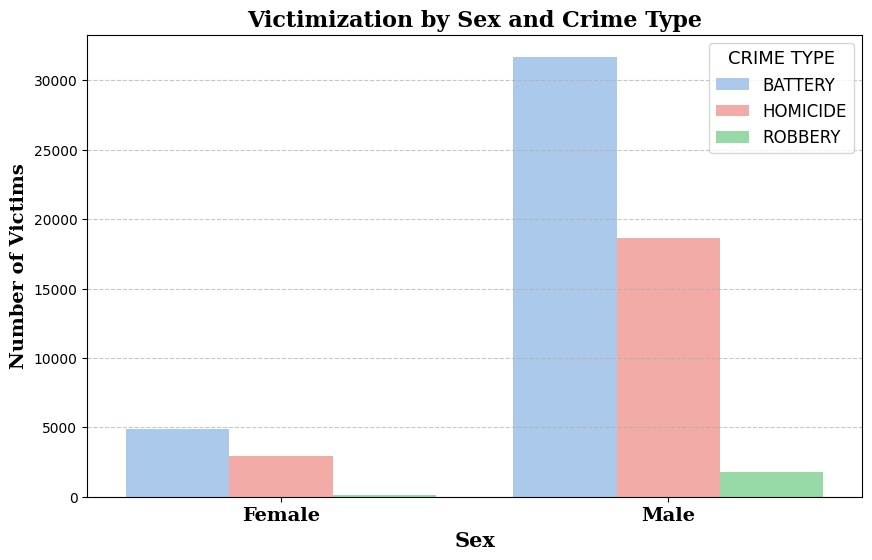

In [ ]:
import pandas as pd #import libraries
import matplotlib.pyplot as plt
import seaborn as sns
#pastel colors
#used in presentation; have the numbers as backup in other slide
pastel_colors = sns.color_palette("pastel")

#fix colors for homicide, battery and robbery
crime_colors = {"HOMICIDE": pastel_colors[3], "BATTERY": pastel_colors[0], "ROBBERY": pastel_colors[2]}

#replace sex to female and male
crime_sex_counts['sex'] = crime_sex_counts['sex'].replace({"F": "Female", "M": "Male"})

#box plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=crime_sex_counts,
    x='sex',
    y='count',
    hue='victimization_primary',
    palette=crime_colors  #use pastel colors
)
#labels and titles
#use serif family
#bold all legends
plt.xlabel("Sex", fontsize=15, fontweight='bold',  fontfamily="serif")
plt.xticks(fontsize=14, fontweight='bold', fontfamily="serif")
plt.ylabel("Number of Victims", fontsize=14, fontweight='bold', fontfamily="serif")
plt.title("Victimization by Sex and Crime Type", fontsize=16, fontweight='bold', fontfamily="serif")
plt.legend(title="CRIME TYPE", fontsize=12, title_fontsize=13)
#add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)


#show the plot
plt.show()

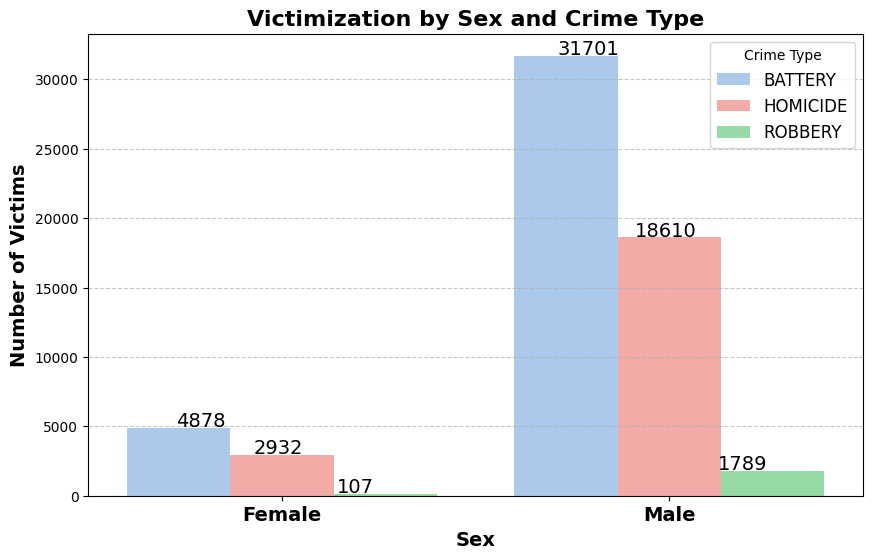

In [ ]:
#SIMILAR TO PREVIOUS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#pastel colors
pastel_colors = sns.color_palette("pastel")

crime_colors = {"HOMICIDE": pastel_colors[3], "BATTERY": pastel_colors[0], "ROBBERY": pastel_colors[2]}

##label the sexes
crime_sex_counts['sex'] = crime_sex_counts['sex'].replace({"F": "Female", "M": "Male"})

# create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=crime_sex_counts,
    x='sex',  #x axis for sex
    y='count',
    hue='victimization_primary',
    palette=crime_colors
)

for index, row in crime_sex_counts.iterrows():
    x_pos = crime_sex_counts['sex'].unique().tolist().index(row['sex'])
    crime_categories = crime_sex_counts['victimization_primary'].unique()
    hue_offset = -0.21 + 0.4 * list(crime_categories).index(row['victimization_primary']) / (len(crime_categories) - 1)
    #label fit the words

    plt.text(
        x=x_pos + hue_offset,
        y=row['count'] + 100,
        s=f"{row['count']}",
        ha='center',
        fontsize=14,
        color='black'
    )

# labels and title!
plt.xlabel("Sex", fontsize=14, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.ylabel("Number of Victims", fontsize=14, fontweight='bold')
plt.title("Victimization by Sex and Crime Type", fontsize=16, fontweight='bold')
plt.legend(title="Crime Type", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
import pandas as pd

#focus on age groups and specific crimes
selected_crimes = ['HOMICIDE', 'ROBBERY', 'BATTERY']
violence_filtered = violence[violence['victimization_primary'].isin(selected_crimes)].copy()

# remove those that say "unknown"
violence_filtered = violence_filtered[violence_filtered['age'].str.lower() != 'unknown']

#count occurrences for combinatin of crime type and age groups
age_counts = violence_filtered.groupby(['victimization_primary', 'age']).size().reset_index(name='count')

# calculate percentage per crime type!!
age_counts['percentage'] = age_counts.groupby('victimization_primary')['count'].transform(lambda x: (x / x.sum()) * 100)



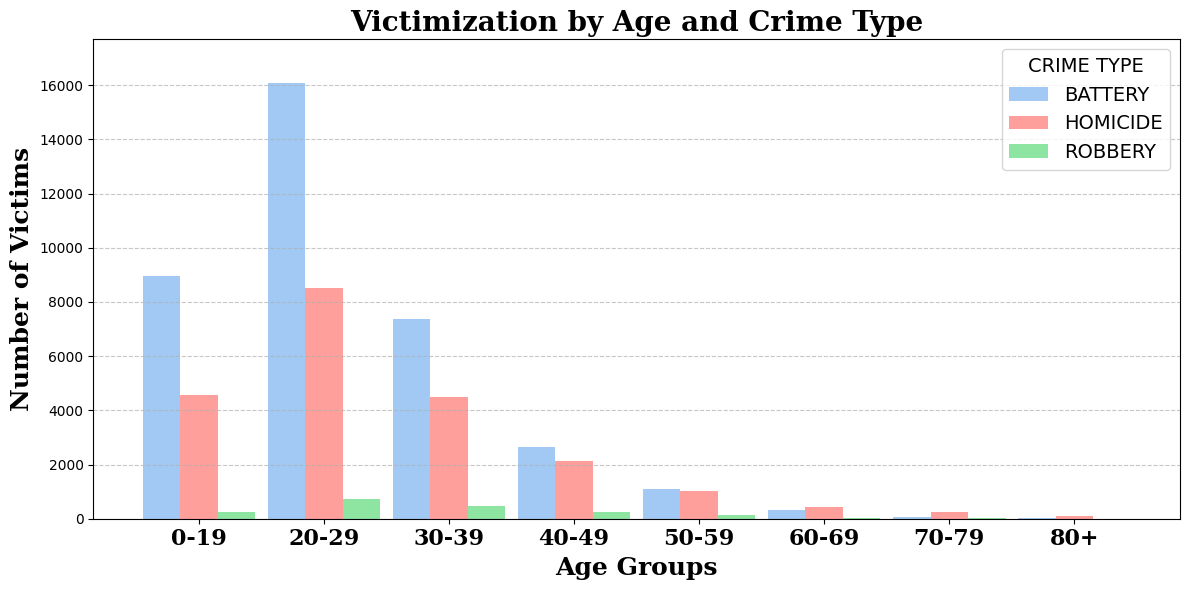

In [ ]:
import matplotlib.pyplot as plt #import libraries
import seaborn as sns
import numpy as np

#used in presentation
pastel_colors = sns.color_palette("pastel")

#same as previous pastel colors
crime_colors = {"HOMICIDE": pastel_colors[3], "BATTERY": pastel_colors[0], "ROBBERY": pastel_colors[2]}

#unique age groups
age_groups = sorted(age_counts['age'].unique())


bar_width = 0.3  #increased bar width
x_indexes = np.arange(len(age_groups))

# figure and axis
plt.figure(figsize=(12, 6))
max_count = 0

#plot for each crime type
for i, crime in enumerate(["BATTERY", "HOMICIDE", "ROBBERY"]):
    crime_data = age_counts[age_counts['victimization_primary'] == crime]
    counts = crime_data.set_index('age')['count'].reindex(age_groups, fill_value=0)  # ensure that all ages are represented
    max_count = max(max_count, counts.max())
    plt.bar(x_indexes + i * bar_width, counts, width=bar_width, color=crime_colors[crime], label=crime)

#add labels
#user serif
#bold
#big font size
plt.xlabel("Age Groups", fontsize=18, fontweight='bold', fontfamily = "serif")
plt.ylabel("Number of Victims", fontsize=18, fontweight='bold', fontfamily = "serif")
plt.title("Victimization by Age and Crime Type", fontsize=20, fontweight='bold',  fontfamily = "serif")


plt.xticks(ticks=x_indexes + bar_width, labels=age_groups, rotation=0, fontsize=16,  fontfamily = "serif", fontweight='bold')

#
plt.legend(title="CRIME TYPE", fontsize=14, title_fontsize=14)

# gridline
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.ylim(0, max_count + max(5, 0.1 * max_count))

#show plot
plt.tight_layout()
plt.show()


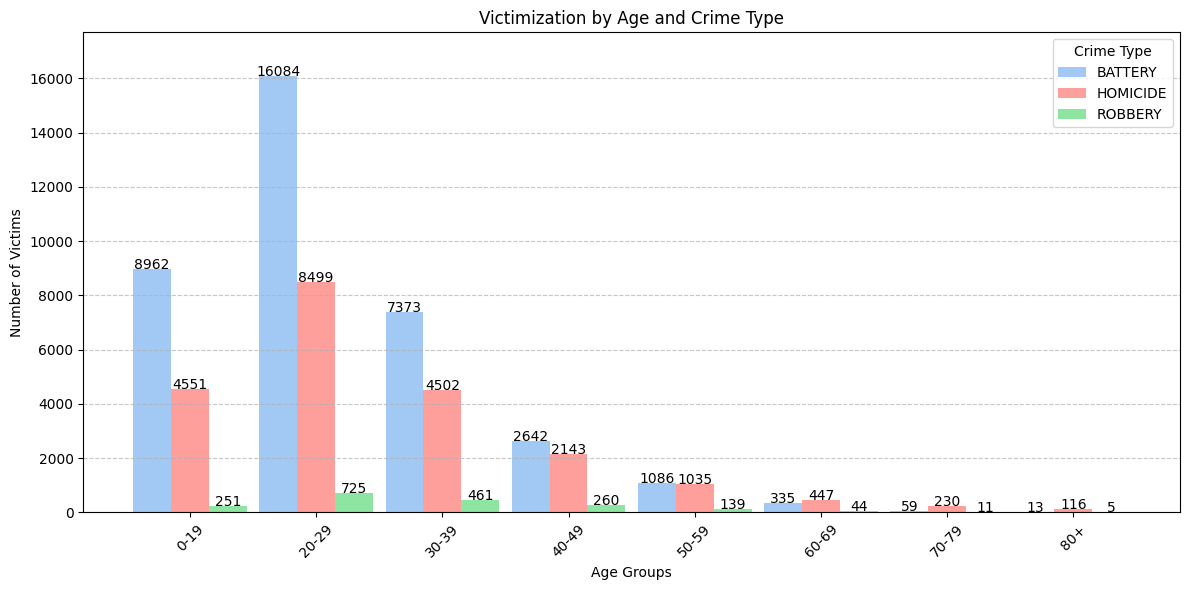

In [ ]:
import matplotlib.pyplot as plt #import the libraries
import seaborn as sns
import numpy as np

#same code as previous
pastel_colors = sns.color_palette("pastel")
crime_colors = {"HOMICIDE": pastel_colors[3], "BATTERY": pastel_colors[0], "ROBBERY": pastel_colors[2]}


age_groups = sorted(age_counts['age'].unique())

bar_width = 0.3
x_indexes = np.arange(len(age_groups))

plt.figure(figsize=(12, 6))

max_count = 0

##plot numbers instead now
for i, crime in enumerate(["BATTERY", "HOMICIDE", "ROBBERY"]):
    crime_data = age_counts[age_counts['victimization_primary'] == crime]
    counts = crime_data.set_index('age')['count'].reindex(age_groups, fill_value=0)  # ensuree all ages are represented
    max_count = max(max_count, counts.max())

    plt.bar(x_indexes + i * bar_width, counts, width=bar_width, color=crime_colors[crime], label=crime)

    #add count labels on top of the bars
    for j, (x, count) in enumerate(zip(x_indexes, counts)):
        plt.text(x + i * bar_width, count + 1, f'{int(count)}', ha='center', fontsize=10, color='black')


#label the plots
plt.ylabel("Number of Victims")
plt.title("Victimization by Age and Crime Type")


xtick_labels = [str(age) if str(age) != "29-29" else f"\033[1;31m{age}\033[0m" for age in age_groups]
plt.xticks(ticks=x_indexes + bar_width, labels=age_groups, rotation=45)

plt.legend(title="Crime Type")


plt.ylim(0, max_count + max(5, 0.1 * max_count))
plt.grid(axis='y', linestyle='--', alpha=0.7)
#DISPLAY
plt.tight_layout()
plt.show()


<ipython-input-61-0f7d23e54b7f>:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x + i * bar_width, counts[j] + 3, f'{pct:.1f}%', ha='center', fontsize=10, color='black')  # Percentage label


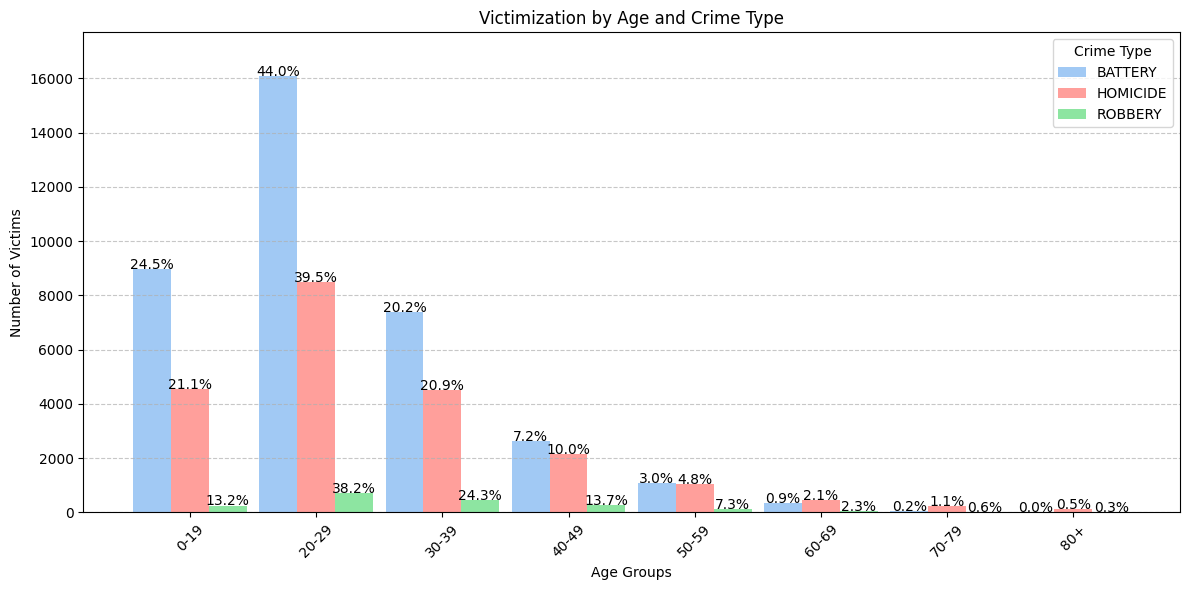

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#SAME CODE AS PREVIOUS
#ADD PERCENTAGES INSTEAD
pastel_colors = sns.color_palette("pastel")

#SAME COLORS AS PREIVOUS
crime_colors = {"HOMICIDE": pastel_colors[3], "BATTERY": pastel_colors[0], "ROBBERY": pastel_colors[2]}

# unique age groups
age_groups = sorted(age_counts['age'].unique())


bar_width = 0.3
x_indexes = np.arange(len(age_groups))

#create figure
plt.figure(figsize=(12, 6))

max_count = 0

for i, crime in enumerate(["BATTERY", "HOMICIDE", "ROBBERY"]):
    crime_data = age_counts[age_counts['victimization_primary'] == crime]
    counts = crime_data.set_index('age')['count'].reindex(age_groups, fill_value=0)
    percentages = crime_data.set_index('age')['percentage'].reindex(age_groups, fill_value=0)
    max_count = max(max_count, counts.max())

    plt.bar(x_indexes + i * bar_width, counts, width=bar_width, color=crime_colors[crime], label=crime)

    # add percentage labels on top of the bars
    for j, (x, pct) in enumerate(zip(x_indexes, percentages)):
        plt.text(x + i * bar_width, counts[j] + 3, f'{pct:.1f}%', ha='center', fontsize=10, color='black') #PERCENTAGE

#ADD LABLELS
plt.xlabel("Age Groups")
plt.ylabel("Number of Victims")
plt.title("Victimization by Age and Crime Type")
xtick_labels = [str(age) if str(age) != "29-29" else f"\033[1;31m{age}\033[0m" for age in age_groups]
plt.xticks(ticks=x_indexes + bar_width, labels=age_groups, rotation=45)
plt.legend(title="Crime Type")


plt.ylim(0, max_count + max(5, 0.1 * max_count))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

#specific crimes
focuses on races now#
selected_crimes = ['ROBBERY', 'HOMICIDE', 'BATTERY']
violence_filtered = violence[violence['victimization_primary'].isin(selected_crimes)]

# group by crime type and race, then count occurrences
crime_race_counts = (
    violence_filtered
    .groupby(['victimization_primary', 'race'])
    .size()
    .reset_index(name='count')
)

# remove "UNKNOWN"
crime_race_counts = crime_race_counts[crime_race_counts['race'] != 'UNKNOWN']


total_by_crime = crime_race_counts.groupby('victimization_primary')['count'].transform('sum')

# calculate the percentage for each race per crime type!!!
crime_race_counts['percentage'] = (crime_race_counts['count'] / total_by_crime) * 100


In [ ]:
crime_race_counts

,victimization_primary,race,count,percentage
0,BATTERY,API,112,0.308914
1,BATTERY,BLK,28821,79.493049
2,BATTERY,I,15,0.041372
4,BATTERY,WBH,295,0.813658
5,BATTERY,WHI,734,2.024492
6,BATTERY,WWH,6279,17.318513
7,HOMICIDE,API,113,0.524727
8,HOMICIDE,BLK,16340,75.876480
9,HOMICIDE,I,14,0.065010
11,HOMICIDE,WBH,75,0.348270


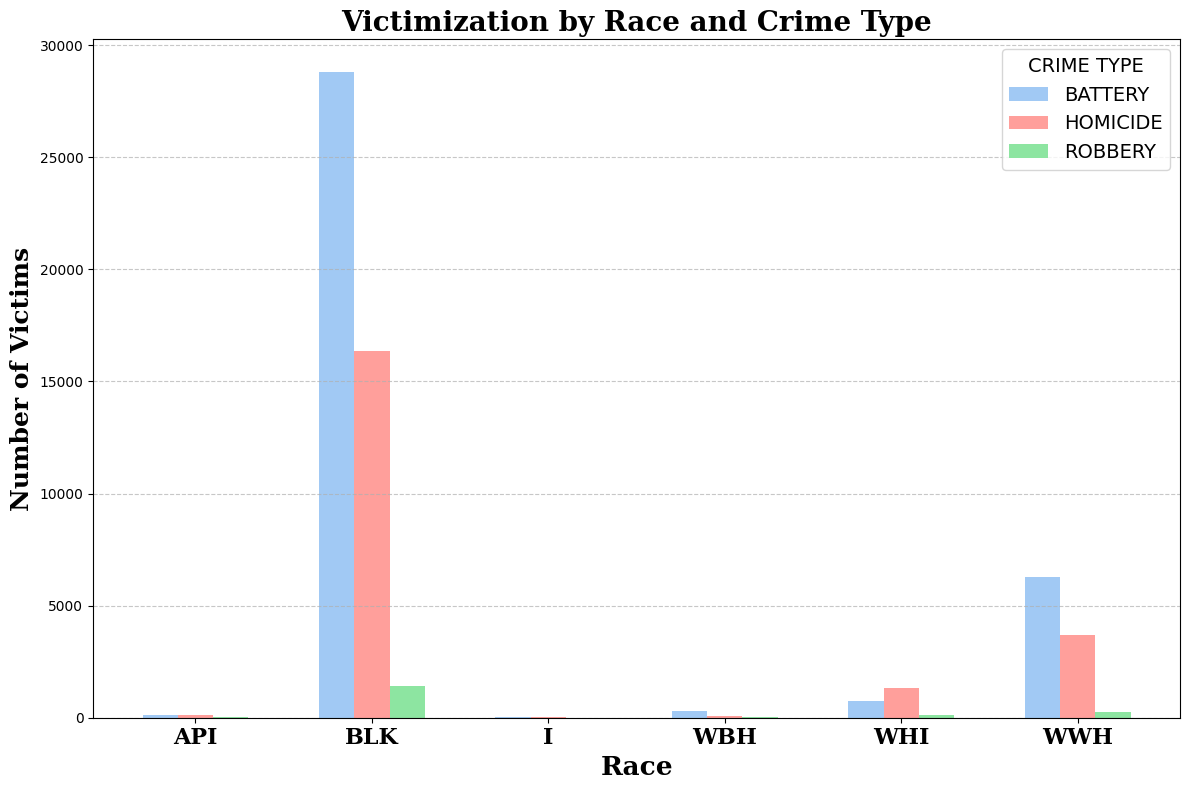

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.font_manager as fm  #import everything


pastel_colors = sns.color_palette("pastel")

crime_colors = {"BATTERY": pastel_colors[0], "HOMICIDE": pastel_colors[3], "ROBBERY": pastel_colors[2]}

unique_races = crime_race_counts["race"].unique()
selected_crimes = ["BATTERY", "HOMICIDE", "ROBBERY"]

bar_width = 0.2
x = np.arange(len(unique_races))

#create the figure!!
plt.figure(figsize=(12, 8))


for i, crime in enumerate(selected_crimes):
    crime_data = crime_race_counts[crime_race_counts["victimization_primary"] == crime]
    counts = [crime_data[crime_data["race"] == race]["count"].values[0] if race in crime_data["race"].values else 0 for race in unique_races]

    bars = plt.bar(x + i * bar_width, counts, width=bar_width, label=crime, color=crime_colors[crime])

#ploteverything
#fontfamily = "serif"
plt.xlabel("Race", fontsize=19, fontweight='bold', fontfamily = "serif")
plt.ylabel("Number of Victims", fontsize=18, fontweight='bold', fontfamily = "serif")
plt.title("Victimization by Race and Crime Type", fontsize=20, fontweight='bold',fontfamily = "serif")
plt.xticks(ticks=x + bar_width, labels=unique_races, rotation=0, fontsize=16, fontfamily = "serif", fontweight='bold')

#serif font
plt.legend(title="CRIME TYPE", fontsize=14,title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()

#show ur plot
plt.show()


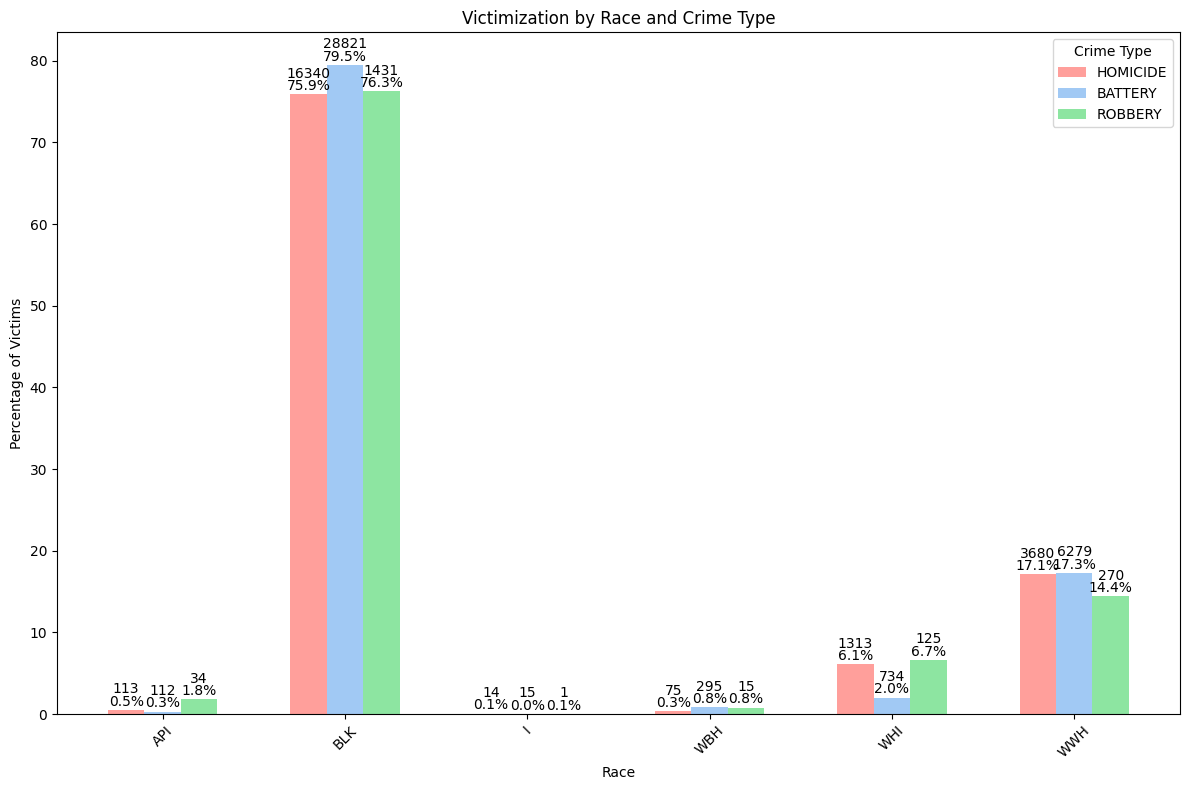

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#ADDS BOTH PERCENTAGES AND  COUNT LABELS
#SAME PASTEL COLORS
pastel_colors = sns.color_palette("pastel")


crime_colors = {"HOMICIDE": pastel_colors[3], "BATTERY": pastel_colors[0], "ROBBERY": pastel_colors[2]}

unique_races = crime_race_counts["race"].unique()
selected_crimes = ["HOMICIDE", "BATTERY", "ROBBERY"]


bar_width = 0.2
x = np.arange(len(unique_races))
#figure
plt.figure(figsize=(12, 8))


for i, crime in enumerate(selected_crimes):
    crime_data = crime_race_counts[crime_race_counts["victimization_primary"] == crime]

    percentages = [crime_data[crime_data["race"] == race]["percentage"].values[0] if race in crime_data["race"].values else 0 for race in unique_races]
    counts = [crime_data[crime_data["race"] == race]["count"].values[0] if race in crime_data["race"].values else 0 for race in unique_races]

    bars = plt.bar(x + i * bar_width, percentages, width=bar_width, label=crime, color=crime_colors[crime])

    # PERCENTAGE LABELS
    for bar, pct in zip(bars, percentages):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{pct:.1f}%', ha='center', fontsize=10)

    # COUNTLABELS
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, f'{count}', ha='center', fontsize=10, color='black')


plt.xlabel("Race")
plt.ylabel("Percentage of Victims")
plt.title("Victimization by Race and Crime Type")
plt.xticks(ticks=x + bar_width, labels=unique_races, rotation=45)

plt.legend(title="Crime Type")
plt.tight_layout()

plt.show()